# Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import tikzplotlib  # type: ignore

# Results directory

In [2]:
RESULTS_DIR = Path("results/new_group_test_4")

# File

In [3]:
DATA = RESULTS_DIR / "compromise_results.csv"
COLLECTIVE = RESULTS_DIR / "collective_results.csv"
PATH = RESULTS_DIR / "path_results.csv"

# Read files

In [4]:
df = pd.read_csv(DATA)
df_collective = pd.read_csv(COLLECTIVE)
df_path = pd.read_csv(PATH)

# New attributes

In [5]:
df["Gen"] = np.array(["Homogene", "Heterogene"])[df["Group"] % 2]
df["Accept"] = np.array(["Conservative", "Tolerant"])[df["Group"] % 2]

df["Changes_Prop"] = df["Changes"] / (df["N_bc"] * df["Group_size"])

# Merge data

In [6]:
# df = pd.merge(
#     df_mip,
#     df_path,
#     how="left",
#     on=[
#         "M",
#         "N_tr",
#         "Atr_id",
#         "Ko",
#         "Mo_id",
#         "Group_size",
#         "Group",
#         "Mi_id",
#         "N_bc",
#         "Same_alt",
#         "D_id",
#         "Config",
#         "Mc_id",
#         "Path",
#         "P_id",
#         "It"
#     ],
#     suffixes=["_mip", "_path"],
# )
df

,M,N_tr,Atr_id,Ko,Mo_id,Group_size,Group,Mi_id,N_bc,Same_alt,...,P_id,Mie_id,Mc_id,Compromise,Time,It,Changes,Gen,Accept,Changes_Prop
0,3,100,1,1,1,2,0,1,20,True,...,1,1,1,True,0.310414,1,6,Homogene,Conservative,0.150
1,3,100,1,1,1,2,0,1,20,True,...,1,1,1,True,0.287581,1,6,Homogene,Conservative,0.150
2,3,100,9,1,9,2,0,9,40,True,...,9,9,9,True,0.566333,1,0,Homogene,Conservative,0.000
3,3,100,2,1,2,2,0,2,20,True,...,2,2,2,True,0.699184,1,1,Homogene,Conservative,0.025
4,3,100,9,1,9,2,0,9,20,True,...,9,9,9,True,0.716064,1,4,Homogene,Conservative,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,3,100,0,1,0,3,1,0,80,True,...,0,0,0,False,3602.675748,65,0,Heterogene,Tolerant,0.000
9596,3,100,0,1,0,3,1,0,100,True,...,0,0,0,False,3602.614368,1,0,Heterogene,Tolerant,0.000
9597,3,100,0,1,0,3,1,0,100,True,...,0,0,0,False,3602.239827,1,0,Heterogene,Tolerant,0.000
9598,3,100,0,1,0,2,1,0,20,True,...,0,0,0,False,3599.053670,2267,0,Heterogene,Tolerant,0.000


# Filter

In [7]:
# dff = df[df["Fitness_train"] == 1]
# dff = df[df["N_tr"].isin([10, 20, 30, 80, 90, 100])]
# dff = df[df["N_tr"] % 20 == 0]
dff = df[(df["Gen"] == "Homogene") & (~ df["Mie"]) & (df["Ko"] <= 3)]

In [8]:
dff

,M,N_tr,Atr_id,Ko,Mo_id,Group_size,Group,Mi_id,N_bc,Same_alt,...,P_id,Mie_id,Mc_id,Compromise,Time,It,Changes,Gen,Accept,Changes_Prop
0,3,100,1,1,1,2,0,1,20,True,...,1,1,1,True,0.310414,1,6,Homogene,Conservative,0.1500
1,3,100,1,1,1,2,0,1,20,True,...,1,1,1,True,0.287581,1,6,Homogene,Conservative,0.1500
2,3,100,9,1,9,2,0,9,40,True,...,9,9,9,True,0.566333,1,0,Homogene,Conservative,0.0000
3,3,100,2,1,2,2,0,2,20,True,...,2,2,2,True,0.699184,1,1,Homogene,Conservative,0.0250
5,3,100,6,1,6,2,0,6,20,True,...,6,6,6,True,0.606060,1,2,Homogene,Conservative,0.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504,3,100,3,1,3,2,0,3,40,True,...,3,3,3,True,3.868403,1,5,Homogene,Conservative,0.0625
9506,3,100,3,1,3,2,0,3,20,True,...,3,3,3,True,0.422221,1,3,Homogene,Conservative,0.0750
9507,3,100,3,1,3,2,0,3,20,True,...,3,3,3,True,0.427715,1,3,Homogene,Conservative,0.0750
9514,5,100,3,2,3,2,0,3,20,True,...,3,3,3,False,3599.443576,5,0,Homogene,Conservative,0.0000


# Plot

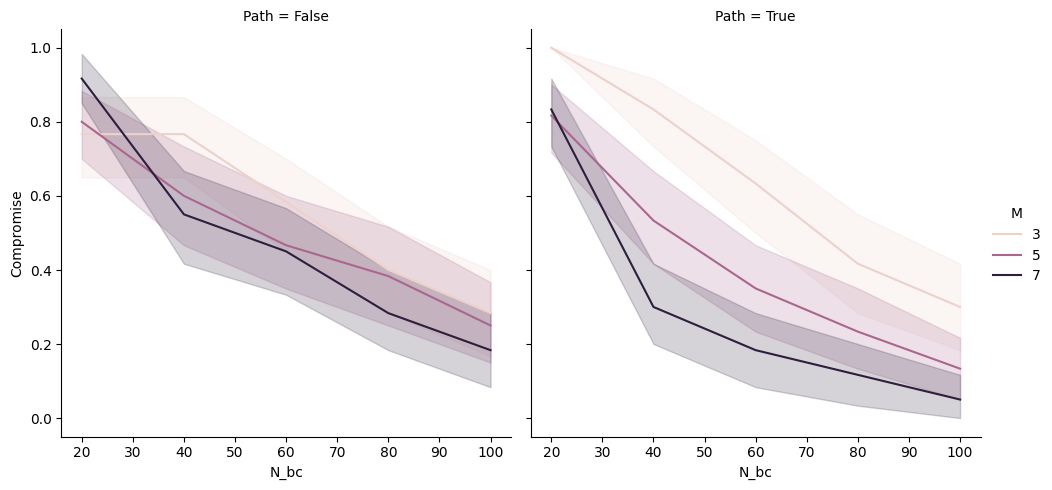

In [9]:
g = sns.relplot(
    dff,
    x="N_bc",
    y="Compromise",
    # row="Path",
    col="Path",
    hue="M",
    kind="line",
)

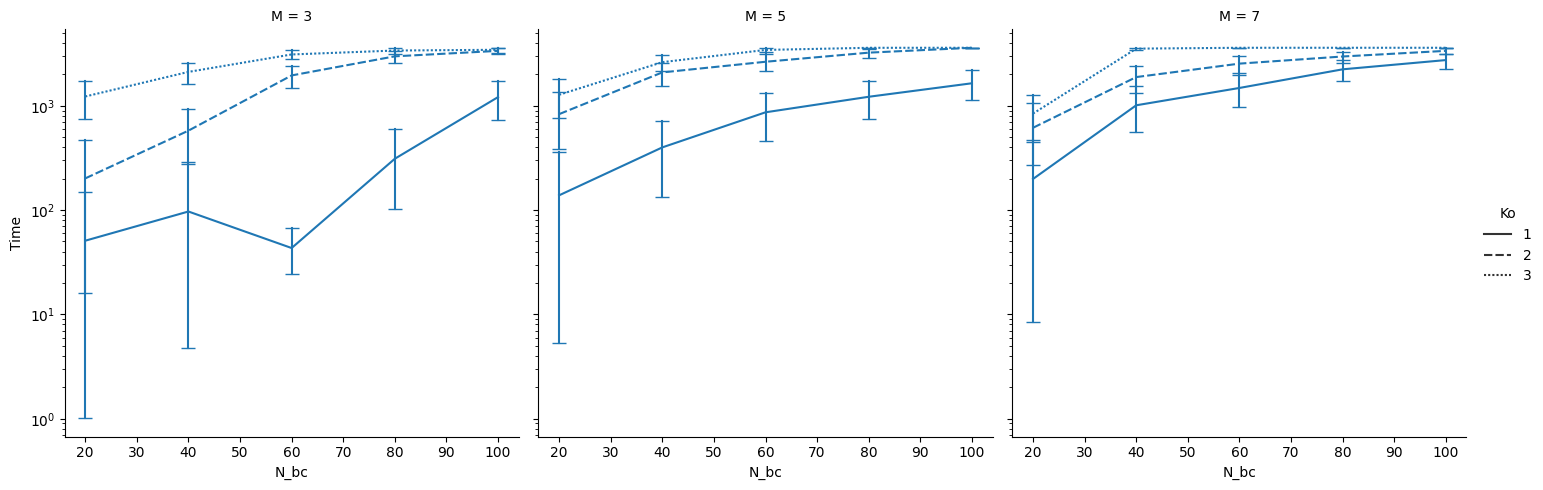

In [10]:
g = sns.relplot(
    dff,
    x="N_bc",
    y="Time",
    # row="Accept",
    col="M",
    style="Ko",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)
plt.yscale("log")

tikzplotlib.save("mytikz.tex", standalone=True)

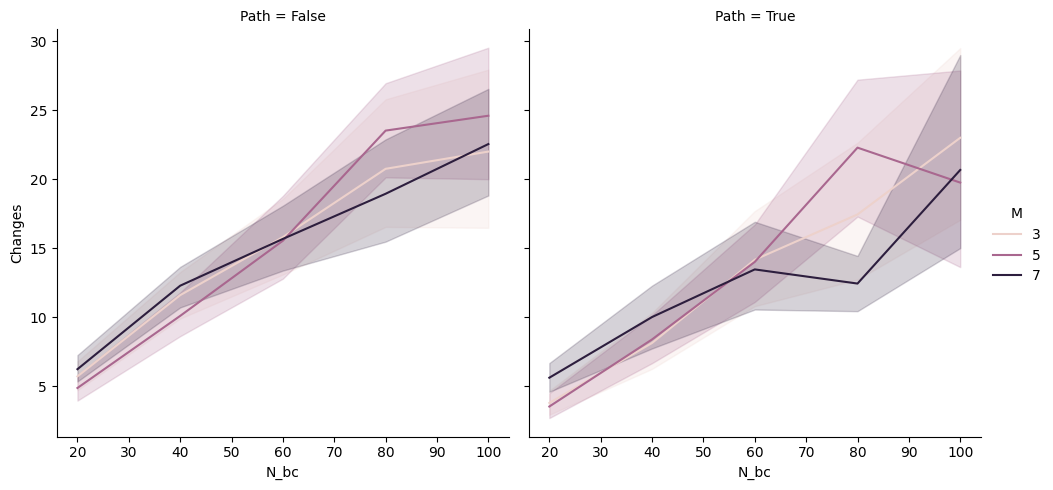

In [11]:
g = sns.relplot(
    dff[dff["Compromise"]],
    x="N_bc",
    y="Changes",
    # row="Path",
    col="Path",
    hue="M",
    kind="line",
)

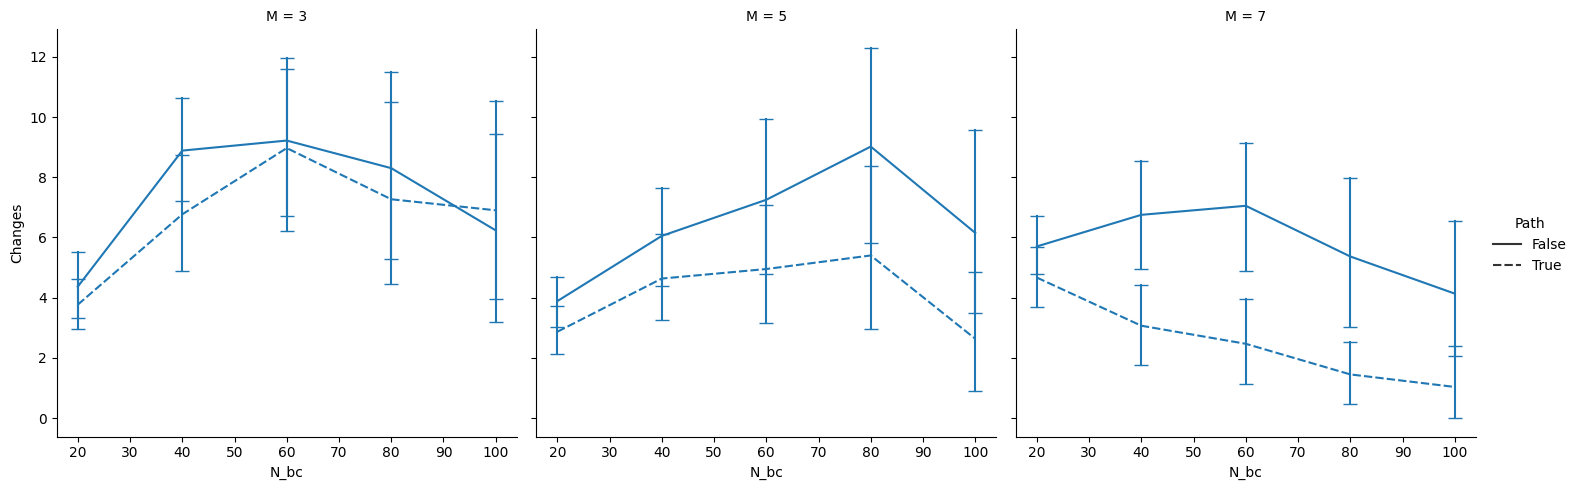

In [13]:
g = sns.relplot(
    dff,
    x="N_bc",
    y="Changes",
    # hue="Ko",
    # row="Accept",
    col="M",
    kind="line",
    style="Path",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

tikzplotlib.save("mytikz.tex", standalone=True)

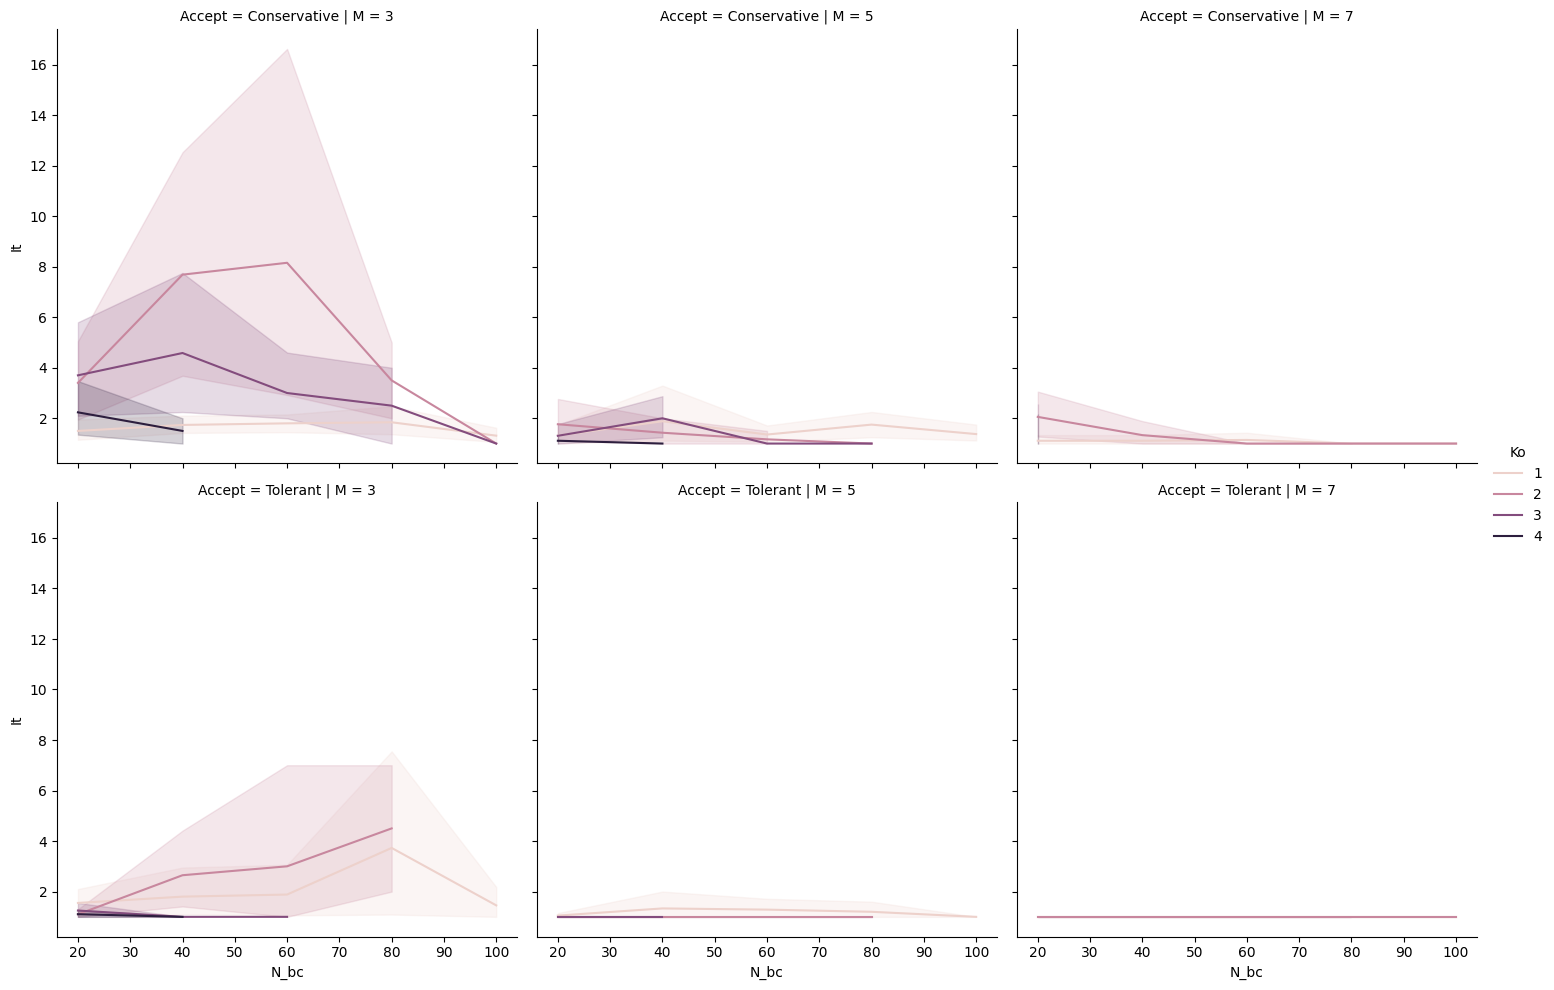

In [37]:
g = sns.relplot(
    dff[dff["Compromise"]],
    x="N_bc",
    y="It",
    hue="Ko",
    row="Accept",
    col="M",
    kind="line",
)

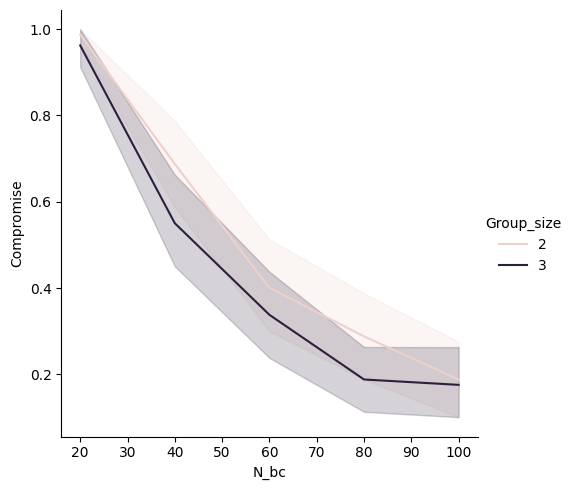

In [38]:
g = sns.relplot(
    dff[dff["M"] == 3], x="N_bc", y="Compromise", hue="Group_size", kind="line"
)

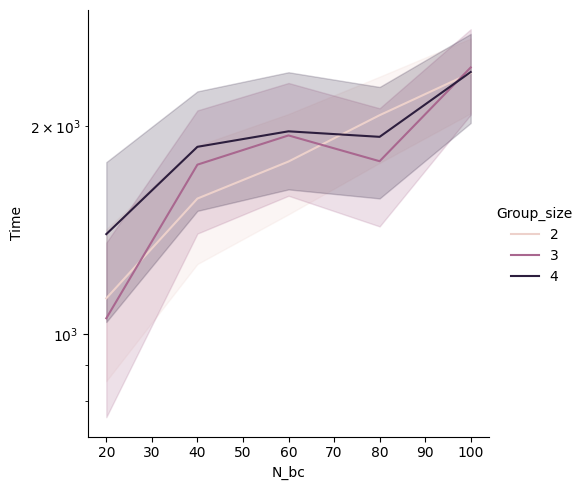

In [170]:
g = sns.relplot(dff[dff["M"] == 3], x="N_bc", y="Time", hue="Group_size", kind="line")
plt.yscale("log")

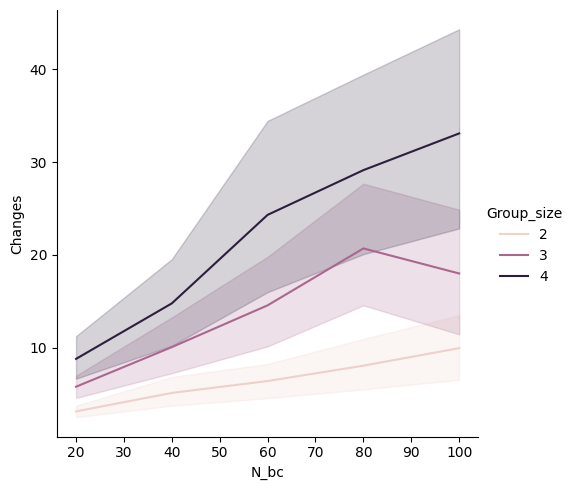

In [161]:
g = sns.relplot(
    dff[dff["M"] == 3], x="N_bc", y="Changes", hue="Group_size", kind="line"
)

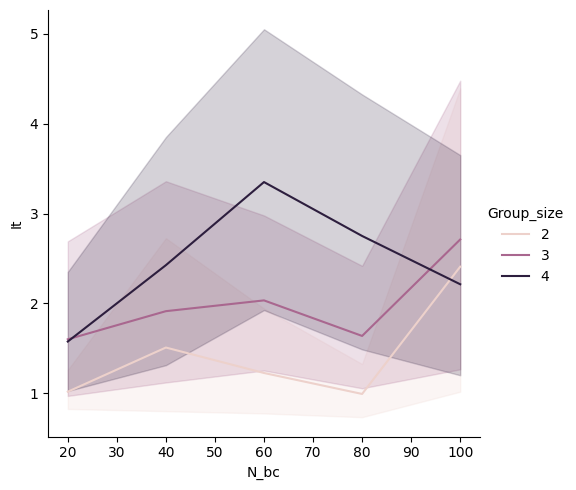

In [160]:
g = sns.relplot(dff[dff["M"] == 3], x="N_bc", y="It", hue="Group_size", kind="line")

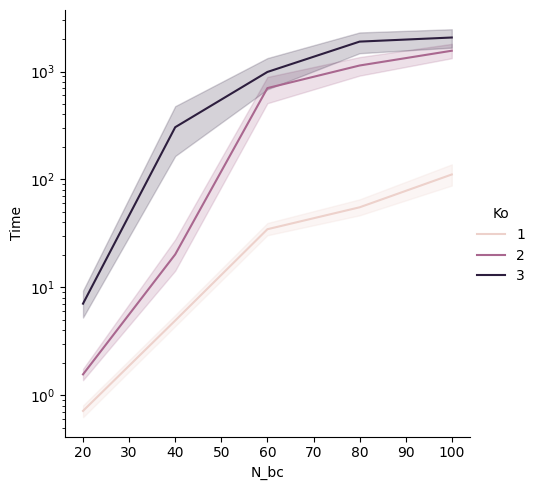

In [166]:
g = sns.relplot(df_mip[df_mip["M"] == 3], x="N_bc", y="Time", hue="Ko", kind="line")
plt.yscale("log")

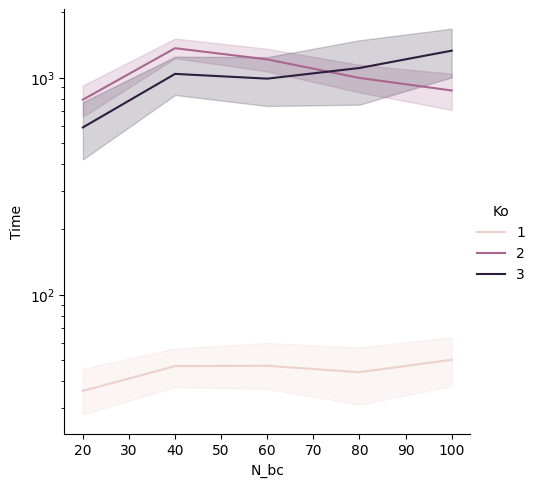

In [173]:
g = sns.relplot(df_path[df_path["M"] == 3], x="N_bc", y="Time", hue="Ko", kind="line")
plt.yscale("log")

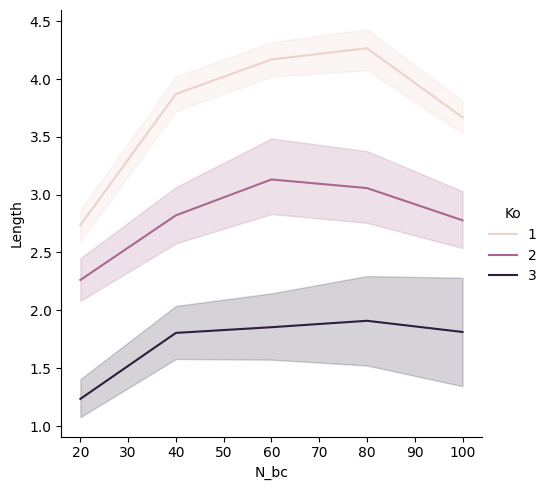

In [174]:
g = sns.relplot(df_path[df_path["M"] == 3], x="N_bc", y="Length", hue="Ko", kind="line")

# Compare

In [50]:
df_path = df[df["Path"]]
df_nopath = df[~df["Path"]]

In [ ]:
df_compare = pd.merge(
    df_path,
    df_nopath,
    on=[
        "M",
        "N_tr",
        "Atr_id",
        "Ko",
        "Mo_id",
        "Group_size",
        "Group",
        "Mi_id",
        "N_bc",
        "Same_alt",
        "D_id",
        "Config",
        "Mc_id",
        "P_id",
        "Gen",
        "Accept",
    ],
    suffixes=["_path", "_nopath"],
)

In [55]:
df_compare["Time_diff"] = df_compare["Time_nopath"] - df_compare["Time_path"]
df_compare["It_diff"] = df_compare["It_nopath"] - df_compare["It_path"]
df_compare["Changes_diff"] = df_compare["Changes_nopath"] - df_compare["Changes_path"]

In [52]:
df_compare

,M,N_tr,Atr_id,Ko,Mo_id,Group_size,Group,Mi_id,N_bc,Same_alt,...,Changes_path,Gen,Accept,Changes_Prop_path,Path_nopath,Compromise_nopath,Time_nopath,It_nopath,Changes_nopath,Changes_Prop_nopath
0,3,100,7,1,7,2,0,7,100,True,...,3,Homogene,Conservative,0.03,False,True,1.846158,1,3,0.03
1,3,100,3,1,3,2,0,3,100,True,...,8,Homogene,Conservative,0.08,False,True,2.258389,1,8,0.08
2,3,100,8,1,8,2,0,8,100,True,...,25,Homogene,Conservative,0.25,False,True,2.160547,1,25,0.25
3,3,100,6,1,6,2,0,6,100,True,...,19,Homogene,Conservative,0.19,False,True,1.802598,1,19,0.19
4,3,100,4,1,4,2,0,4,100,True,...,21,Homogene,Conservative,0.21,False,True,2.080524,1,21,0.21
5,3,100,0,1,0,2,0,0,100,True,...,27,Homogene,Conservative,0.27,False,True,2.481643,1,27,0.27
6,3,100,5,1,5,2,0,5,100,True,...,15,Homogene,Conservative,0.15,False,True,2.807193,1,15,0.15
7,3,100,1,1,1,2,0,1,100,True,...,18,Homogene,Conservative,0.18,False,True,2.975664,1,18,0.18
8,3,100,9,1,9,2,0,9,100,True,...,12,Homogene,Conservative,0.12,False,True,4.788062,1,12,0.12
9,3,100,2,1,2,2,0,2,100,True,...,36,Homogene,Conservative,0.36,False,False,60.063864,6,0,0.00


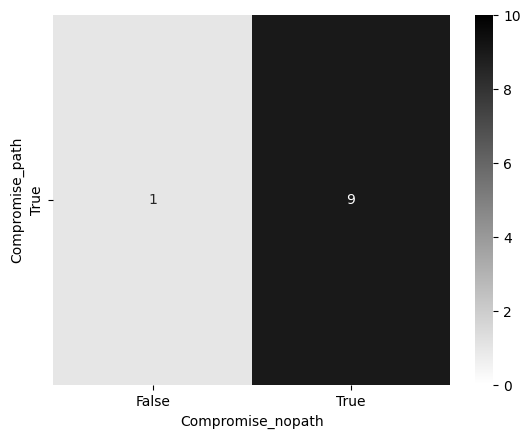

In [ ]:
g = sns.heatmap(
    data=df_compare.pivot_table(
        index="Compromise_path",
        columns="Compromise_nopath",
        aggfunc="size",
        fill_value=0,
    ),
    vmin=0,
    vmax=len(df_compare),
    cmap="binary",
    annot=True,
)

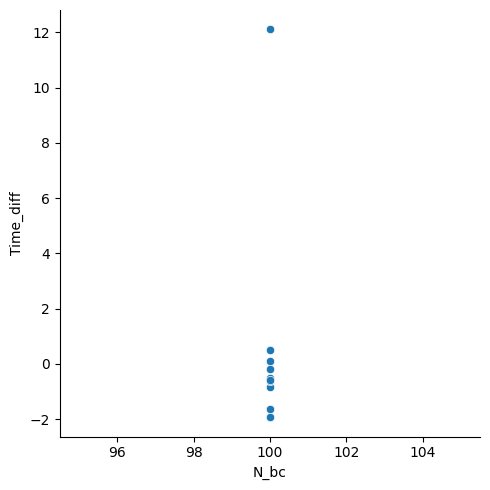

In [58]:
g = sns.relplot(df_compare, x="N_bc", y="Time_diff")